In [54]:
#Installing the necessary libraries
%pip install seaborn
%pip install scikit-learn

In [55]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [56]:
#Loading the Datasets
df = pd.read_csv('IRIS.csv')
# Returning top 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
#Returning a quick summary of the Dataset
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [58]:
#Provides information about the number of rows and columns in the Dataset 
df.shape

(150, 5)

In [59]:
#Provides the description of the data in the Dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
#Distribution of different species in your dataset. 
#It provides insights into how many instances of each species are present
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Distribution of Measurements')

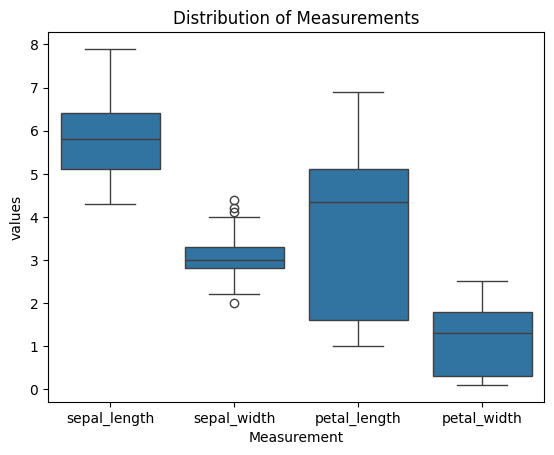

In [61]:
#Distribution of the variables
df1= df.drop('species', axis=1).melt(value_vars=df.drop('species', axis=1).columns)
sns.boxplot(df1, x='variable', y= 'value')
plt.xlabel('Measurement')
plt.ylabel('values')
plt.title('Distribution of Measurements')


In [62]:
#forming x and y variables 
X = df.drop('species', axis=1)
Y = df['species']

In [63]:
#spliting the feature variable (X) and target variable (Y) into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100, stratify=Y)
print(f'''X Train: {X_train.shape}
X Test: {X_test.shape}
Y Train: {Y_train.shape}
Y Test: {Y_test.shape} ''')

X Train: (120, 4)
X Test: (30, 4)
Y Train: (120,)
Y Test: (30,) 


In [64]:
#Scaling the preprocess data 
preprocess = Pipeline([
    ('Scaler',StandardScaler())
])

# defines a pipeline for a machine learning model that includes both preprocessing steps and a classifier.
model= Pipeline([
    ('preprocess',preprocess),
    ('classifier',LogisticRegression(multi_class='multinomial'))
])
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('Scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [65]:
#Making Prediction
Y_pred = model.predict(X_test)
Y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

Text(0.5, 1.0, 'Confusion Matrix for the Classification')

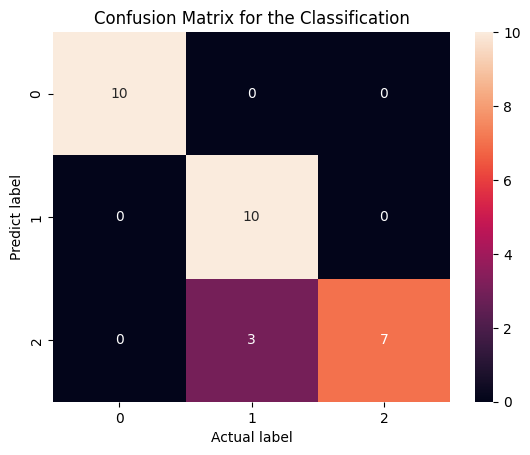

In [66]:
#Generating a heatmap of Confusion Matrix for the Classification
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual label')
plt.ylabel('Predict label')
plt.title('Confusion Matrix for the Classification')

In [67]:
cr = classification_report(Y_test,Y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.70      0.82        10

       accuracy                           0.90        30
      macro avg       0.92      0.90      0.90        30
   weighted avg       0.92      0.90      0.90        30



In [68]:
#t provides a summary of various classification metrics
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# contain the predicted labels for the test data X_test
y_pred = classifier.predict(X_test)

In [70]:
#Checking the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9
